In [1]:
# General Python Imports
import math,time,random,datetime


# Data Manipulation Imports
import numpy as np
import pandas as pd

#Visualization Imports
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#Pre-processing Imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

#Machine learning Imports
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

#Ignore warning for time being
import warnings
warnings.filterwarnings("ignore")





In [2]:
#import sys
#!{sys.executable} -m pip install catboost

In [3]:
#Loading input csv files.
train=pd.read_csv("datasets/train.csv")
test=pd.read_csv("datasets/test.csv")
submission=pd.read_csv("datasets/gender_submission.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [18]:
# Standard Approach towards this Machine Learning Problem
# Understand nature of the data .info() .describe()
#Light Data Exploration
  # Histograms and boxplots 
  # Value counts 
  # Missing data 
  # Correlation between the metrics 
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 
# Feature engineering 
# preprocess data together or use a transformer? 
    # use label for train and test   
# Scaling?

# Model Baseline 
# Model comparison with CV 

In [6]:
# creating two df's one for continuos features another for categorical features
# Be careful some categorical features will be numeric e.g Ordinal and Nominal

In [7]:
# My Approach towards a Machine Learning Probelm is first Understanding the Data received. 

# First get the data in pandas dataframe.
# Checkout data types and missign value
# Obtain Two data frames one for Continous Variables, Another for Categorical Variables.
# Use Descriptive Statistics to explore the data.
   # Numerical Data
            #Univariate Analysis 
                #Central Tendency,Spread of Distribution, Graphs (Histogram,Bar Graph), Shape of Distribution(Gaussian, skewness ,kurtosis), Normality QQ Plots)
            #Multivariate Analysis 
                #Compare Means, Correlation Matrix, Pivot table comparing Dependent Variable across Numerical Independent Variables.
   # Categorical Data
            #Univariate Analysis
                #Summary measures(count values) to understand balance of classes in the form of frequency tables, bar charts, or pie charts.
            #Multivariate Analysis
                #Cross Tabulation, Pivot table comparing Dependent Variable across Categorical Independent Variables.
   # You can try to normalize and standardize the data now. Or make a note of it to do in Data Preprocessing.
   # Try to find any abnormality is data in real world terms and try to fix that or ignore that (e.g max marks is 1104.3 or age is 402874 years)
                
# Use Inferential Statistics to analyse the data & gain some inference from data.
    # Association (Pearson's correlation , Chi Square Test of Independence)
    # Comparing means (One sample t test,paired sample t test, independent sample t test,one way anova)
                
    # Independent Variable Level	     Dependent Variable Level	                            Analysis

    # Dichotomous	                          Continuous	                      Independent Samples t-Test, Linear Regression
    # Nominal or Ordinal	                  Continuous	                                     ANOVA
    # Continuous	                          Continuous	                       Linear Regression, Pearson’s Correlation
    # Continuous or Categorical	              Dichotomous	                       Binary Logistic Regression
    # Continuous or Categorical	              Ordinal	                           Ordinal Logistic Regression
    # Categorical	                          Categorical	                                  Chi Square

    

In [17]:
# Gives info about datatypes and missing values.
train.info()   # train.dtypes will give only datatype info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Descriptions
Survival: 0 = No, 1 = Yes

pclass (Ticket class): 1 = 1st, 2 = 2nd, 3 = 3rd

sex: Sex

Age: Age in years

sibsp: number of siblings/spouses aboard the Titanic

parch: number of parents/children aboard the Titanic

ticket: Ticket number

fare: Passenger fare

cabin: Cabin number

embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

<AxesSubplot:>

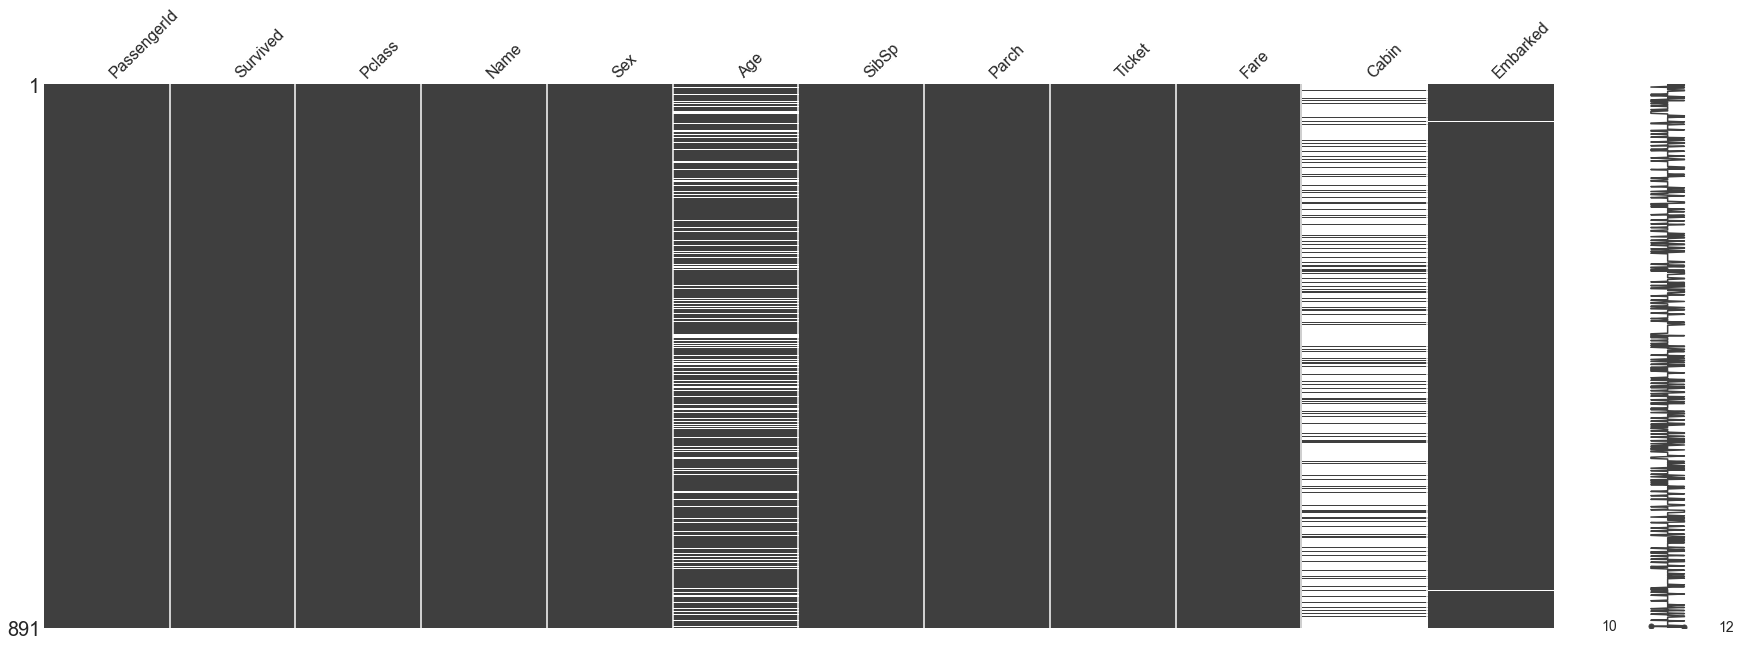

In [9]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

In [19]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# look at numeric and categorical values separately 
df_num = train[['Age','SibSp','Parch','Fare']]
df_cat = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [21]:
# to better understand the numeric data, we want to use the .describe() method. This gives us an understanding of the central tendencies of the data 
df_num.describe()

# Observations:
# Average age of people aboard titanic was 29, 
# 68% of all people were between approx age 15-43 (1 standard deviation)
# 95% of all people were between approx age 1-57 (2 standard deviations)
# The youngest passenger is a 4 month child , Oldest passenger is 80 years Person.
# 25% of people below age 20, 50% of people were below age 28, 75% of people were below age 38.
# Few missing age  data for some passengers

# Maximum no of siblings/spouse a passenger had was 8.
# 50% of passengers were without siblings/spouse, 75% of passenger has less than 1 sibling/spouse

# Max no : parent/child one person has is 6, 75% of passengers do not have parent/child along with them.

# Avg Fare cost was $32.  




,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


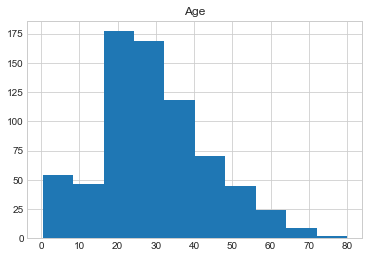

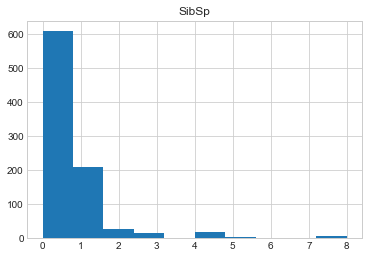

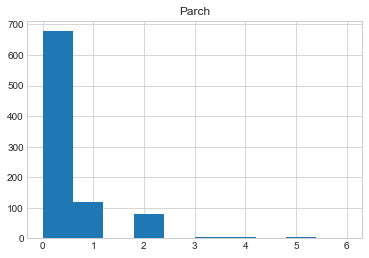

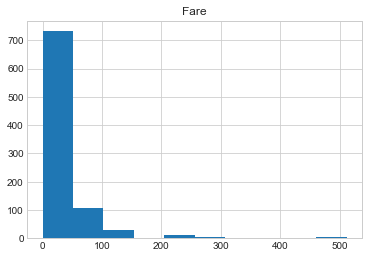

In [28]:
#distributions for all numeric variables 
for i in df_num.columns:
   plt.hist(df_num[i])
   plt.title(i)
   plt.show()
#Perhaps we should take the non-normal distributions and consider normalizing them?  => in Feature Engineering

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

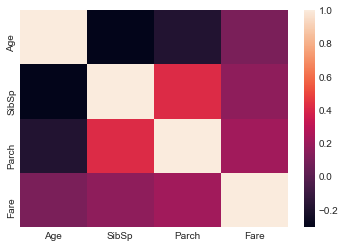

In [33]:
# Correlation analysis analysis
print(df_num.corr())
sns.heatmap(df_num.corr())

# Shows some correlation between sibsp and parent/child but less significant.


In [36]:
# compare survival rate across Age, SibSp, Parch, and Fare 
#pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
pd.pivot_table(train,index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# 